In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os

#from py_files.c_target_exploration import mod_concat_NEMDE
#from py_files.d_concat_DUID_marginal_fuelsource import *

In [2]:
file_path1 = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
file_path2 = '{}/nem-data/nemde_clean/df_DUID_CO2_sum.pkl'.format(os.environ['HOME'])

In [10]:
def correct_timedelta(df, time_diff):
    '''
    df.index must be DateTimeIndex
    Returns two lists
    df=table_of_interest
    col="column_of_interest"
    time_diff=time_diff in seconds as int
    '''
    lst = []
    lst_i = []
    
    for i in range(1,df.shape[0]):
        delta = abs(df.index[i] - df.index[i-1])
        if int(delta.total_seconds()) != int(time_diff):
            lst.append(("from index {} on, it has been {} s or {} h.".format(i,int(delta.total_seconds()),(int(delta.total_seconds()/3600)))))
            lst_i.append((df.index[i],int(delta.total_seconds())))
            
    return lst, lst_i

In [3]:
df_mean = pd.read_pickle(file_path1)
df_sum = pd.read_pickle(file_path2)

In [25]:
a1,b1 = correct_timedelta(df_mean, 300)
a2,b2 = correct_timedelta(df_sum, 300)

In [26]:
print(len(a1))
print(len(a2))

0
0


### __Visualise CO2 over price__

In [4]:
print(df_mean.CO2E_EMISSIONS_FACTOR.min())
print(df_mean.CO2E_EMISSIONS_FACTOR.max())

print(df_sum.CO2E_EMISSIONS_FACTOR.min())
print(df_sum.CO2E_EMISSIONS_FACTOR.max())

0.0
1.4918
0.0
34.36431766999999


In [5]:
bins_mean = list(np.linspace(df_mean.CO2E_EMISSIONS_FACTOR.min()-0.000001,
                      df_mean.CO2E_EMISSIONS_FACTOR.max()+0.000001, 
                      10))
type(bins_mean)
group_names_mean = bins_mean[:-1]
group_names_mean

[-1e-06,
 0.16575477777777775,
 0.33151055555555553,
 0.4972663333333333,
 0.663022111111111,
 0.8287778888888887,
 0.9945336666666665,
 1.1602894444444443,
 1.326045222222222]

In [6]:
bins_mean

[-1e-06,
 0.16575477777777775,
 0.33151055555555553,
 0.4972663333333333,
 0.663022111111111,
 0.8287778888888887,
 0.9945336666666665,
 1.1602894444444443,
 1.326045222222222,
 1.491801]

In [7]:
bins_sum = list(np.linspace(df_sum.CO2E_EMISSIONS_FACTOR.min()-0.000001,
                      df_sum.CO2E_EMISSIONS_FACTOR.max()+0.000001, 
                      10))
type(bins_sum)
group_names_sum = bins_sum[:-1]
group_names_sum

[-1e-06,
 3.8182567411111092,
 7.636514482222219,
 11.454772223333329,
 15.273029964444438,
 19.091287705555548,
 22.909545446666655,
 26.727803187777763,
 30.546060928888874]

In [8]:
df_mean["CO2_group"] = pd.cut(df_mean.CO2E_EMISSIONS_FACTOR, bins_mean, labels=group_names_mean)

In [9]:
df_sum["CO2_group"] = pd.cut(df_sum.CO2E_EMISSIONS_FACTOR, bins_sum, labels=group_names_sum)

In [10]:
df_mean.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
2019-08-01 03:55:00,79.52391,0.380340,0.331511
2019-08-01 03:50:00,79.17710,0.456409,0.331511
2019-08-01 03:45:00,85.14416,0.573436,0.497266
2019-08-01 03:40:00,84.78689,0.573436,0.497266
2019-08-01 03:35:00,84.78346,0.573436,0.497266


In [13]:
df_sum.iloc[30:40]

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
2019-08-01 01:25:00,77.49000,0.544686,-0.000001
2019-08-01 01:20:00,83.03012,0.000000,-0.000001
2019-08-01 01:15:00,82.99757,0.000000,-0.000001
2019-08-01 01:10:00,97.71736,0.570054,-0.000001
2019-08-01 01:05:00,98.49020,4.251360,3.818257
2019-08-01 01:00:00,98.64343,3.705699,-0.000001
2019-08-01 00:55:00,101.00000,4.877690,3.818257
2019-08-01 00:50:00,101.00000,4.877690,3.818257
2019-08-01 00:45:00,101.00003,4.169130,3.818257
2019-08-01 00:40:00,101.00000,6.294810,3.818257


In [36]:
print(df_mean.isna().any())
print(df_sum.isna().any())

Price                    True
CO2E_EMISSIONS_FACTOR    True
CO2_group                True
dtype: bool
Price                    True
CO2E_EMISSIONS_FACTOR    True
CO2_group                True
dtype: bool


In [37]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060704 entries, 2019-08-01 03:55:00 to 2009-07-01 04:00:00
Freq: -5T
Data columns (total 3 columns):
Price                    1043372 non-null float64
CO2E_EMISSIONS_FACTOR    1006719 non-null float64
CO2_group                1006719 non-null category
dtypes: category(1), float64(2)
memory usage: 25.3 MB


In [38]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060704 entries, 2019-08-01 03:55:00 to 2009-07-01 04:00:00
Freq: -5T
Data columns (total 3 columns):
Price                    1043372 non-null float64
CO2E_EMISSIONS_FACTOR    1043372 non-null float64
CO2_group                1043372 non-null category
dtypes: category(1), float64(2)
memory usage: 25.3 MB


In [14]:
#mean = df_mean.groupby("CO2_group").mean()
#mean.head()

In [44]:
#fig = sns.barplot(mean.index, mean.Price)
#for i in fig.get_xticklabels():
#    i.set_rotation(90)
#plt.figure();

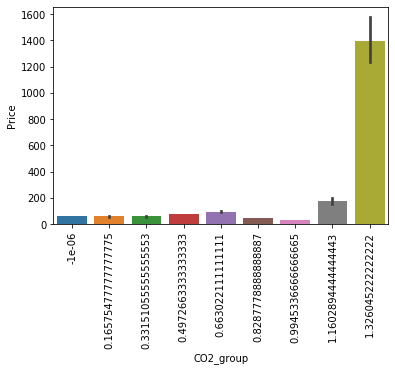

<Figure size 432x288 with 0 Axes>

In [42]:
fig = sns.barplot(df_mean.CO2_group, df_mean.Price)
for i in fig.get_xticklabels():
    i.set_rotation(90)
plt.figure();

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 864x360 with 0 Axes>

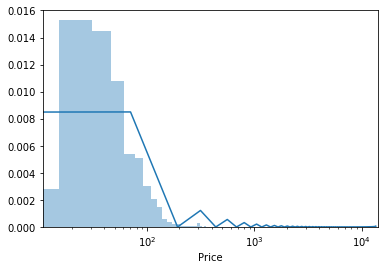

<Figure size 864x360 with 0 Axes>

In [34]:
fig = sns.distplot(df_mean.loc[:,["Price"]].fillna(value=-2000).Price, bins=1000)
fig.set_xscale('log')
fig.set_xlim(-1001,14000)
plt.figure(figsize=(12,5))

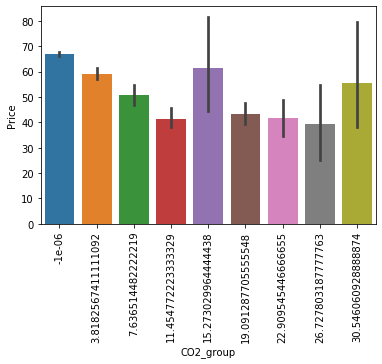

<Figure size 432x288 with 0 Axes>

In [43]:
#the problem with the summed representation is that demand is not reduced from it (the higher the demand, the more marginal generators, the higher marginal CO2)

fig = sns.barplot(df_sum.CO2_group, df_sum.Price)
for i in fig.get_xticklabels():
    i.set_rotation(90)
plt.figure();